# Regression and Other Stories: Chapter 6

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from bambi import Model
import arviz as az
import numpy as np

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [2]:
# R is one indexed
x = np.arange(1, 21)
n = x.shape
a = .2
b = .3
sigma = .5
y = a + b*x + sigma*stats.norm().rvs(n)

In [3]:
fake = pd.DataFrame({"x":x, "y":y})

In [4]:
model = Model(fake)
results = model.fit('y ~ x', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
INFO:pymc3:Sequential sampling (4 chains in 1 job)
NUTS: [y_sd, x, Intercept]
INFO:pymc3:NUTS: [y_sd, x, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 29 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 29 seconds.
The acceptance probability does not match the target. It is 0.8900832177152619, but should be close to 0.8. Try to increase the number of tuning steps.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6800277692804648, but should be close to 0.8. Try to increase the number of tuning steps.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 4 divergences a

In [5]:
func_dict = {"Median": np.median,
            "MAD_SD":stats.median_abs_deviation,
             }
coefs = az.summary(results, stat_funcs=func_dict, extend=False)
coefs

,Median,MAD_SD
Intercept[0],0.439,0.123
x[0],0.260,0.010
y_sd,0.370,0.047


Text(10.5, 3.169, 'y = 0.44 + 0.26 * x')

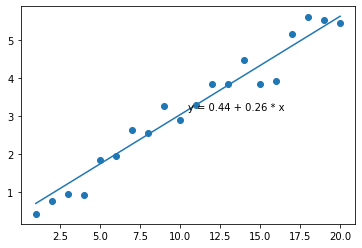

In [6]:
a_hat = coefs.loc["Intercept[0]", "Median"]
b_hat = coefs.loc["x[0]", "Median"]

fig, ax = plt.subplots()
ax.plot(x, a_hat+b_hat*x)
ax.scatter(x, y)

x_bar = x.mean()
ax.text(x_bar, a_hat+b_hat*x_bar,
       f"y = {np.round(a_hat, 2)} + {np.round(b_hat, 2)} * x")

In [7]:
earnings = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/Earnings/data/earnings.csv")

In [8]:
earnings["earnk"] = earnings["earn"]/1000

In [9]:
model = Model(earnings)
results = model.fit('earnk ~ height + male', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
INFO:pymc3:Sequential sampling (4 chains in 1 job)
NUTS: [earnk_sd, male, height, Intercept]
INFO:pymc3:NUTS: [earnk_sd, male, height, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 170 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 170 seconds.
The acceptance probability does not match the target. It is 0.891184984546182, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.
INFO:pymc3:The number of effective samples is smaller than 25% for some parameters.
/opt/conda/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


In [10]:
coefs = az.summary(results, stat_funcs=func_dict, extend=False)
coefs

,Median,MAD_SD
Intercept[0],-25.646,8.524
height[0],0.643,0.131
male[0],10.651,1.007
earnk_sd,21.404,0.248


In [11]:
1-(coefs.loc["earnk_sd", "Median"]**2 / earnings["earnk"].std()**2)

0.09759923705843654

In [12]:
heights = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/PearsonLee/data/Heights.txt",
                      delimiter=" ")
heights.iloc[:5]

,daughter_height,mother_height
0,52.5,59.5
1,52.5,59.5
2,53.5,59.5
3,53.5,59.5
4,55.5,59.5


In [13]:
model = Model(heights)
results = model.fit('daughter_height ~ mother_height', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
INFO:pymc3:Sequential sampling (4 chains in 1 job)
NUTS: [daughter_height_sd, mother_height, Intercept]
INFO:pymc3:NUTS: [daughter_height_sd, mother_height, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 215 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 215 seconds.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc3:There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
/opt/conda/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


In [14]:
coefs = az.summary(results, stat_funcs=func_dict, extend=False)
coefs

,Median,MAD_SD
Intercept[0],29.807,0.532
mother_height[0],0.545,0.009
daughter_height_sd,2.261,0.015


In [15]:
n = heights.shape[0]
mother_height_jitt = heights["mother_height"] + stats.uniform(-.5,.5).rvs(n)
daughter_height_jitt = heights["daughter_height"] + stats.uniform(-.5,.5).rvs(n)


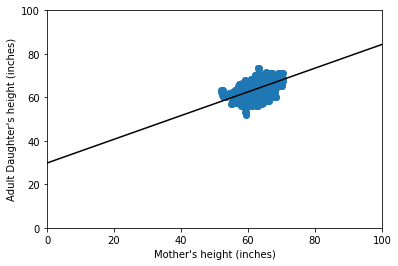

In [16]:
fig, ax = plt.subplots()
ax.scatter(mother_height_jitt, daughter_height_jitt)
ax.set_xlabel("Mother's height (inches)")
ax.set_ylabel("Adult Daughter's height (inches)")

x = np.array([0, 100])

a_hat = coefs.loc["Intercept[0]", "Median"]
b_hat = coefs.loc["mother_height[0]", "Median"]

ax.plot(x, a_hat+b_hat*x, c="black")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100);

In [17]:
n = 1000
true_ability = stats.norm(50, 10).rvs(n)
noise_1 = stats.norm(0, 10).rvs(n)
noise_2 = stats.norm(0, 10).rvs(n)
midterm = true_ability + noise_1
final = true_ability + noise_2

exams = pd.DataFrame({"midterm":midterm, "final":final})

In [18]:
model = Model(exams)
results = model.fit('final ~ midterm', samples=1000, chains=4)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
INFO:pymc3:Sequential sampling (4 chains in 1 job)
NUTS: [final_sd, midterm, Intercept]
INFO:pymc3:NUTS: [final_sd, midterm, Intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
INFO:pymc3:Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 31 seconds.
The acceptance probability does not match the target. It is 0.8905198575138282, but should be close to 0.8. Try to increase the number of tuning steps.
/opt/conda/lib/python3.7/site-packages/arviz/data/io_pymc3.py:89: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


In [19]:
coefs = az.summary(results, stat_funcs=func_dict, extend=False)
coefs

,Median,MAD_SD
Intercept[0],27.450,0.946
midterm[0],0.470,0.018
final_sd,12.307,0.190


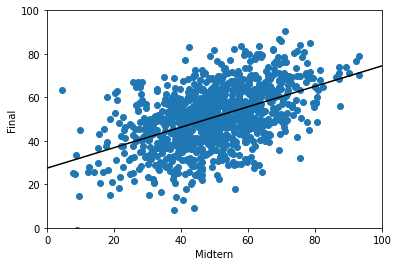

In [20]:
fig, ax = plt.subplots()
ax.scatter(midterm, final)
ax.set_xlabel("Midtern")
ax.set_ylabel("Final")
x = np.array([0, 100])

a_hat = coefs.loc["Intercept[0]", "Median"]
b_hat = coefs.loc["midterm[0]", "Median"]

ax.plot(x, a_hat+b_hat*x, c="black")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100);